##### HW1 Ghanendra MT19213

###### Q1. Read Section 2.3 of SB and generate the plots in Figure 2.2. Also, generate a plot that shows the average absolute error in the estimate for each action (arm) as a function of time steps. In addition to the  in the book, generate the plots for when the  changes with time in a matter such that the sequence of {(t), t ≥ 1} satisfies Equation (2.7).

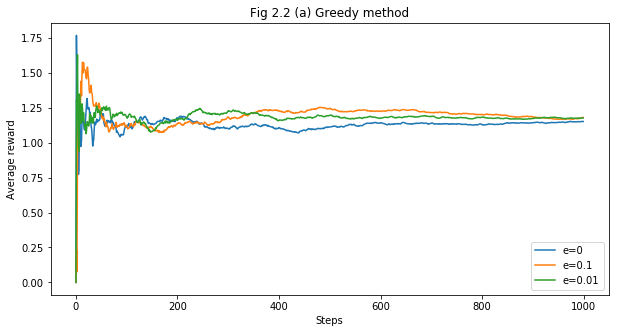

In [45]:
import numpy as np
import matplotlib.pyplot as plt

k = 10 # no of arms    
mean, var = 0, 1 # Mean and variance
# Action values q*(a) selected from normal distribution
q_star = np.random.normal(mean,var,k) # Absolute truth
At = np.random.randint(0,k) #Select first action 
epsilon = [0,0.1,0.01]

#Iteration for 1000 steps
tstep = 1000

#Performing only one run
def bandit_greedy(epsilon):

    # Default value of Qt as zero for all 10 actions
    Q_t = np.zeros([3,k]) # Estimate value for 10 actions
    A_num = np.zeros([3,k]) # Count for no. of actions
    Rt_curr = np.zeros([3,k]) # Reward current
    Q_max = np.zeros([3,tstep]) # Store estimates
    Err_est = np.zeros([3,tstep]) # Absolute error

    for t in range(0,tstep):
        for i in range(3):
            # Calculate estimate value at time t
            for j in range(k):
                if(A_num[i][j]) == 0:
                    Q_t[i][j]=0
                else:
                    Q_t[i][j] = Rt_curr[i][j]/(A_num[i][j])
            
            # Select greedy action from estimate
            A_g = (1-epsilon[i])*np.argmax(Q_t[i])
            A_ng = (epsilon[i]/k)*np.random.randint(0,k)
            At = int(A_g + A_ng)
            Q_max[i][t] = Q_t[i][At]
            # Absolute error in estimate
            Err_est[i][t] = abs(Q_t[i][At] - q_star[At])
            # Select Reward from Normal Distribution
            Rt = np.random.normal(q_star[At],var)
            # Update reward of At
            Rt_curr[i][At] += Rt
            # Update the count of At
            A_num[i][At] += 1
            
            
    return Q_max,Err_est

# Calling bandit function
Qg = bandit_greedy(epsilon) # greedy

# x axis values
xt = np.arange(0,tstep,1)

# #plot data
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(xt,Qg[0][0], label = "e=0")
plt.plot(xt,Qg[0][1], label = "e=0.1")
plt.plot(xt,Qg[0][2], label = "e=0.01")
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Fig 2.2 (a) Greedy method')
plt.legend(loc='lower right')
plt.show()

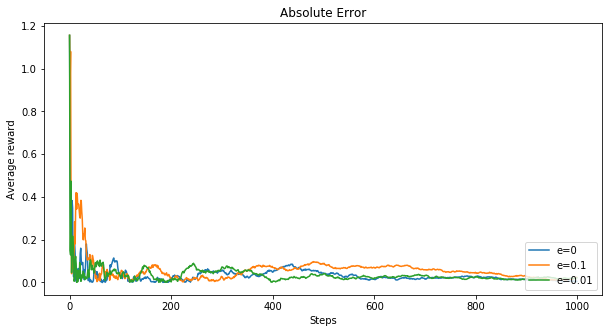

In [46]:
# #plot data
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(xt,Qg[1][0], label = "e=0")
plt.plot(xt,Qg[1][1], label = "e=0.1")
plt.plot(xt,Qg[1][2], label = "e=0.01")
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Absolute Error')
plt.legend(loc='lower right')
plt.show()

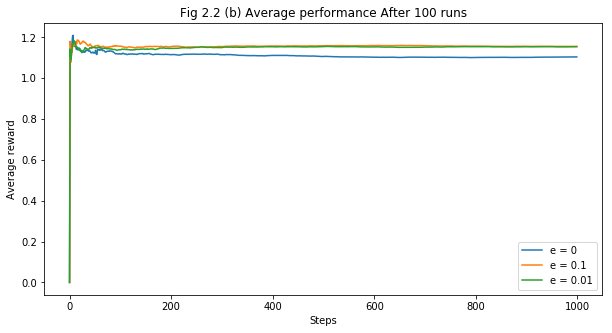

In [47]:
# Estimated time of simulation ~ 10 second
#runs
r = 100

# Array for storing after long run
Qt_g0 = np.zeros([r,tstep])
Qt_g1 = np.zeros([r,tstep])
Qt_g2 = np.zeros([r,tstep])
# Array for storging absolute error
Err_g0 = np.zeros([r,tstep])
Err_g1 = np.zeros([r,tstep])
Err_g2 = np.zeros([r,tstep])

for i in range(r):
    bg = bandit_greedy(epsilon)
    Qt_g0[i] = bg[0][0]
    Qt_g1[i] = bg[0][1]
    Qt_g2[i] = bg[0][2]
    Err_g0[i]= bg[1][0]
    Err_g1[i]= bg[1][1]
    Err_g2[i]= bg[1][2]

g1 = np.average(Qt_g0,axis = 0)
g2 = np.average(Qt_g1,axis = 0)
g3 = np.average(Qt_g2,axis = 0)

err_1 = np.average(Err_g0,axis = 0)
err_2 = np.average(Err_g1,axis = 0)
err_3 = np.average(Err_g2,axis = 0)

#plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(xt,g1,label = "e = 0")
plt.plot(xt,g2,label = "e = 0.1")
plt.plot(xt,g3,label = "e = 0.01")
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Fig 2.2 (b) Average performance After 100 runs')
plt.show()

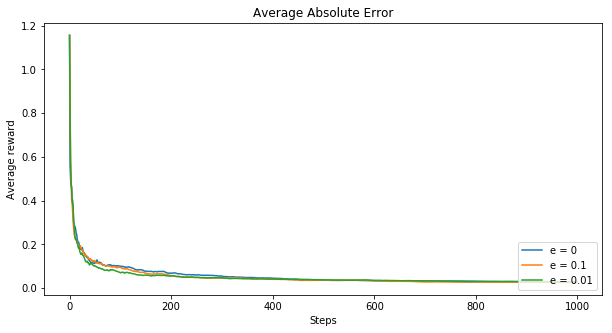

In [48]:
#Plot 
plt.plot(xt,err_1,label = "e = 0")
plt.plot(xt,err_2,label = "e = 0.1")
plt.plot(xt,err_3,label = "e = 0.01")
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Average Absolute Error')
plt.show()

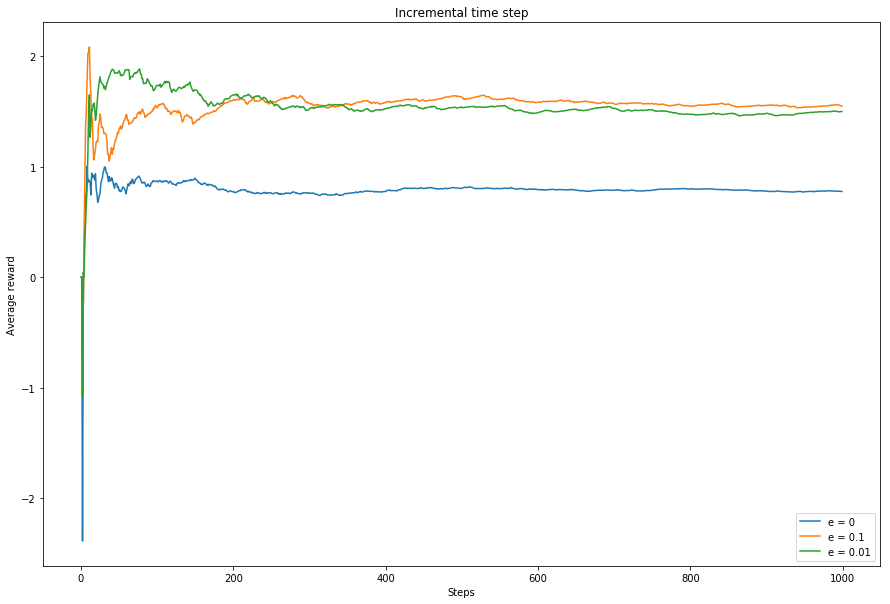

In [359]:
# Using incremental update rule.

mean, var = 0, 1 # Mean and variance
q_star = np.random.normal(mean,var,k) # Absolute truth

def bandit(e,t=1000):
    k = 10 # arms
    Q = np.zeros([t]) # Q
    Qt = np.zeros([k])
    for n in range(1,t-1): 
        Ag = np.argmax(Qt) * (1-e)
        Ang = np.random.randint(0,k) * e
        At = int(Ag + Ang)
        #At = np.argmax(Qt)
        Rn = np.random.normal(q_star[At],var)
        Q[n+1] = Q[n] + (1/n)*(Rn - Q[n])
        Qt[At] = Q[n+1]

    return Q

Q = bandit(0)
Qg = bandit(0.1)
Qg2 = bandit(0.01)
plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(xt,Q,label = "e = 0")
plt.plot(xt,Qg,label = "e = 0.1")
plt.plot(xt,Qg2,label = "e = 0.01")
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Incremental time step')

plt.show()

###### Q2. Repeat Question 1 for when the variance corresponding to each arm is 4 instead of 1.

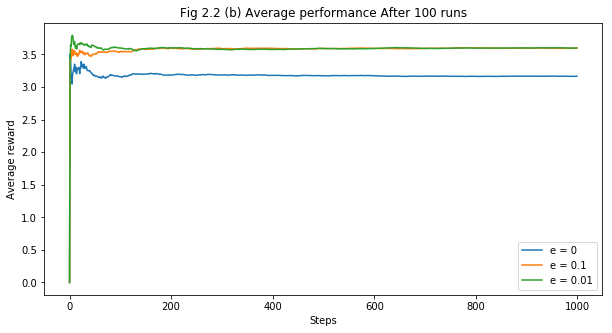

In [69]:
#variance = 4
var = 4
# absolute truth changes
q_star = np.random.normal(mean,var,k) # Absolute truth

# Estimated time of simulation ~ 10 second
#runs
r = 100

# Array for storing after long run
Qt_g0 = np.zeros([r,tstep])
Qt_g1 = np.zeros([r,tstep])
Qt_g2 = np.zeros([r,tstep])
# Array for storging absolute error
Err_g0 = np.zeros([r,tstep])
Err_g1 = np.zeros([r,tstep])
Err_g2 = np.zeros([r,tstep])

for i in range(r):
    bg = bandit_greedy(epsilon)
    Qt_g0[i] = bg[0][0]
    Qt_g1[i] = bg[0][1]
    Qt_g2[i] = bg[0][2]
    Err_g0[i]= bg[1][0]
    Err_g1[i]= bg[1][1]
    Err_g2[i]= bg[1][2]

g1 = np.average(Qt_g0,axis = 0)
g2 = np.average(Qt_g1,axis = 0)
g3 = np.average(Qt_g2,axis = 0)

err_1 = np.average(Err_g0,axis = 0)
err_2 = np.average(Err_g1,axis = 0)
err_3 = np.average(Err_g2,axis = 0)

#plt.rcParams['figure.figsize'] = [15, 10]
plt.plot(xt,g1,label = "e = 0")
plt.plot(xt,g2,label = "e = 0.1")
plt.plot(xt,g3,label = "e = 0.01")
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Fig 2.2 (b) Average performance After 100 runs')
plt.show()


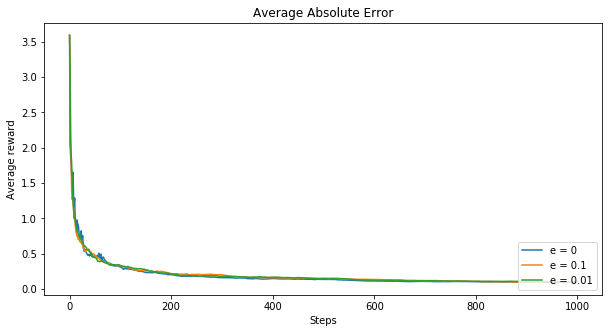

In [70]:
#Plot 
plt.plot(xt,err_1,label = "e = 0")
plt.plot(xt,err_2,label = "e = 0.1")
plt.plot(xt,err_3,label = "e = 0.01")
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Average Absolute Error')
plt.show()


###### Q3. Solve exercise 2.3. Do it for all choices of  in Question 1.

In the long run e_greedy action with e= 0.01 will perform better complared to  e_greedy with e = 0.1 and greedy action with e = 0. By finding out the difference between the average absolute estimate error between the actions.

In [79]:
# Avegage estimate error difference between greedy and e_greedy e = 0.1
diff1 = np.average(err_2 - err_1,axis = 0)
print("e_greedy(e = 0.1) is better than greedy(e=0) on average by: ", diff1)
diff2 = np.average(err_3 - err_1,axis = 0)
print("e_greedy(e = 0.01) is better than greedy(e=0) on average by: ", diff2)
diff3 = np.average(err_2 - err_3,axis = 0)
print("e_greedy(e = 0.1) is better than e_greedy(e=0.01) on average by: ", diff3)

e_greedy(e = 0.1) is better than greedy(e=0) on average by:  0.011366441100673242
e_greedy(e = 0.01) is better than greedy(e=0) on average by:  0.010837910315666801
e_greedy(e = 0.1) is better than e_greedy(e=0.01) on average by:  0.0005285307850064407


###### Q4. Show that the sample mean is not influenced by the initial choice of Q1(a), ∀a, where as when using a constant step-size α (see Equation (2.5)) the estimate Qt(a) is a function of Q1(a). Also, show that the dependence is larger for a smaller α. Propose a method such that we can have a constant step-size but no dependence of Qt(a) on Q1(a).

At the first time step t = 1, in the beginning we choose default values for the estimates of all actions.
First reason is to calculate sample mean for Q1(a), rewards and number of times action is taken depends on (t-1) time step so at t=1, considering starting from t=1, no previous action was taken at t=0, so Q1(a)=~ 0.
Second ultimately the estimate Qt(a) has to converges to the absolute truth q*(a), so only for determing the choice
of action for exploration or exploitation it can help.
Hence, sample mean is not influenced by Q1(a) for all a. 

Q(t+1) = t


Given equation 2.6

Q(t+1) = (1-alpha)^n * Q1 + Summation[from:i=1,n] alpha*(1-alpha)^(n-i) * Ri

If alpha is much smaller than 1 then the first term in 2.6

1-alpha ~= 1 ----- (1)

and second term will be negligible as only the immediate reward add weight to the Qt(a), weightage of past rewards will not be have much significance, assuming reward after (i=1) R1, are not significant.

Summation[]aplha*(~1)^(n-i)* Ri  => alpha*R1 =~ 0   ------- (2)

From (1) and (2)

Qt(a) = Q1 + alpha*Ri
Hence the dependence is larger on Q1 for smaller alpha.


###### Q5. Do Exercise 2.5. Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q⇤(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q⇤(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, ↵ = 0.1. Use E = 0.1 and longer runs, say of 10,000 steps.

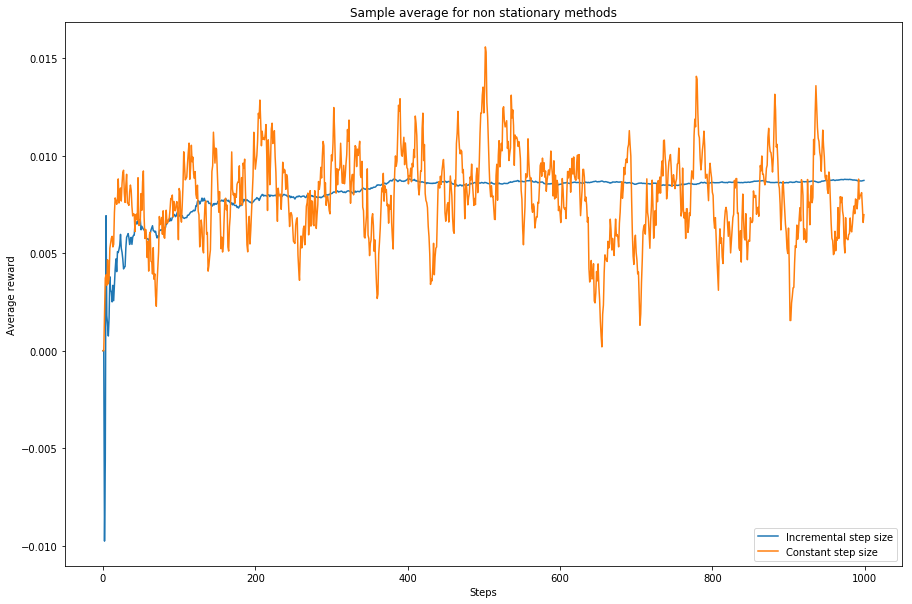

In [389]:
mean, var = 0, 0.01 # Mean and variance
q_star = np.random.normal(mean,var,k) # Absolute truth

#runs
ts = 1000

def bandit_const_step_size(e,t = 1000):
    k = 10 # arms
    alpha = 0.1 # fixed step size
    Q = np.zeros([t]) # Qn
    Qt = np.zeros([k]) # Qt(a)
    for n in range(1,t-1): 
        Ag = np.argmax(Qt) * (1-e)
        Ang = np.random.randint(0,k) * e
        At = int(Ag + Ang)
        #At = np.argmax(Qt)
        Rn = np.random.normal(q_star[At],var)
        Q[n+1] = Q[n] + alpha*(Rn - Q[n])
        Qt[At] = Q[n+1]

    return Q

Qb_var = bandit(0.1,ts)
Qb_fix = bandit_const_step_size(0.1,ts)
xt = np.arange(0,ts)
plt.plot(xt,Qb_var,label = "Incremental step size")
plt.plot(xt,Qb_fix,label = "Constant step size")
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Sample average for non stationary methods')
plt.show()


###### Question 6. Generate Figure 2.4 and solve exercise 2.8. Repeat generation of the figure and solve the exercise for c = 1 and c = 4 too.

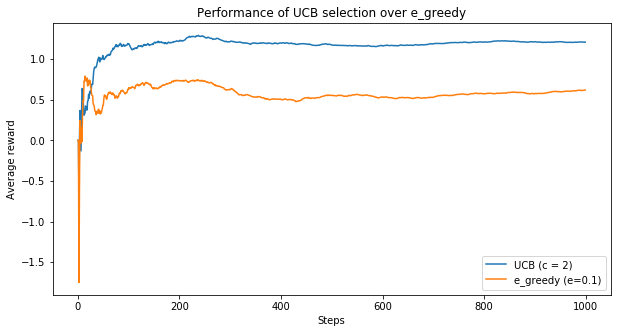

In [575]:
import warnings
warnings.filterwarnings("ignore")
mean, var = 0, 1 # Mean and variance
q_star = np.random.normal(mean,var,k) # Absolute truth

steps = 1000

def UCB(d,n):
    
    k = 10 # arms
    Q = np.zeros([n]) # Qn
    Qt = np.zeros([k]) # Qt(a)
    Nt = np.zeros([k]) # No. of times action is selected
    c = d # degree of exploration
    At = np.random.randint(0,k) #Select first action 
    
    for t in range(1,n-1):
        At = np.argmax(Qt + c*np.sqrt(np.log(t)/Nt[At]))
        Rn = np.random.normal(q_star[At],var)
        Q[t+1] = Q[t] + (1/t)*(Rn - Q[t])
        Qt[At] = Q[t+1]
        Nt[At] += 1

    return Q
# c = 2
Q_ucb = UCB(2,steps)
Qg = bandit(0.1)
xt = np.arange(0,steps,1)
#plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(xt,Q_ucb, label = 'UCB (c = 2)')
plt.plot(xt,Qg,label = 'e_greedy (e=0.1)')
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Performance of UCB selection over e_greedy')
plt.show()

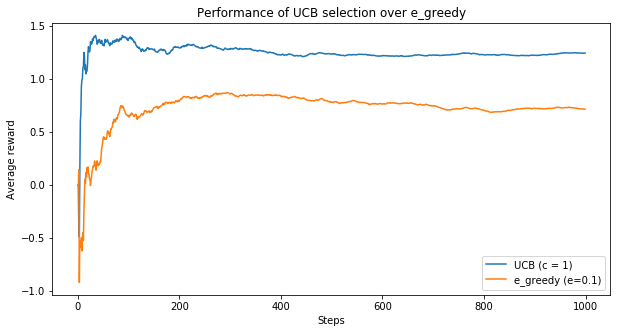

In [600]:
# c = 1
Q_ucb = UCB(1,steps)
Qg = bandit(0.1)
xt = np.arange(0,steps,1)
#plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(xt,Q_ucb, label = 'UCB (c = 1)')
plt.plot(xt,Qg,label = 'e_greedy (e=0.1)')
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Performance of UCB selection over e_greedy')
plt.show()

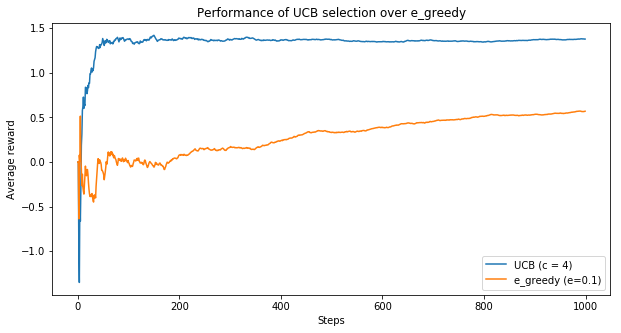

In [603]:
# c = 4

Q_ucb = UCB(4,steps)
Qg = bandit(0.1)
xt = np.arange(0,steps,1)
#plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(xt,Q_ucb, label = 'UCB (c = 4)')
plt.plot(xt,Qg,label = 'e_greedy (e=0.1)')
plt.legend(loc='lower right')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.title('Performance of UCB selection over e_greedy')
plt.show()

###### Q7. Generate Figure 2.5.